<a href="https://colab.research.google.com/github/shiivaniiiii/sweeet__recognition/blob/main/image_classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Libraries

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Data Preprocessing

#Training Image Preprocessing

In [4]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/sweet_recognition/train',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = None,
    color_mode= 'rgb',
    batch_size = 32,
    image_size = (64,64),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset =None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False
)

Found 250 files belonging to 10 classes.


#Validation Image Preprocessing

In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/sweet_recognition/validation',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = None,
    color_mode= 'rgb',
    batch_size = 32,
    image_size = (64,64),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset =None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False
)

Found 200 files belonging to 10 classes.


# Building Model

In [6]:
cnn = tf.keras.models.Sequential()

#Building Convolution Layer

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters= 64, kernel_size =3,activation='relu', input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters= 64, kernel_size =3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Dropout(0.5))  # to avoid overfitting

In [10]:
cnn.add(tf.keras.layers.Flatten())

In [11]:
cnn.add(tf.keras.layers.Dense(units=128,activation= 'relu'))

In [12]:
#output layer
cnn.add(tf.keras.layers.Dense(units=10,activation = 'softmax'))

#Compiling and Training Phase

In [13]:
cnn.compile(optimizer= 'rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [14]:
training_history = cnn.fit(x=training_set,validation_data=validation_set, epochs=30)

Epoch 1/30
8/8 [==============================] - 64s 4s/step - loss: 137.3891 - accuracy: 0.1320 - val_loss: 2.2379 - val_accuracy: 0.2800
Epoch 2/30
8/8 [==============================] - 6s 729ms/step - loss: 2.2809 - accuracy: 0.2200 - val_loss: 1.5883 - val_accuracy: 0.5100
Epoch 3/30
8/8 [==============================] - 4s 401ms/step - loss: 1.7950 - accuracy: 0.4160 - val_loss: 1.5972 - val_accuracy: 0.5300
Epoch 4/30
8/8 [==============================] - 4s 407ms/step - loss: 2.2253 - accuracy: 0.3960 - val_loss: 1.1204 - val_accuracy: 0.6800
Epoch 5/30
8/8 [==============================] - 5s 487ms/step - loss: 1.3008 - accuracy: 0.5520 - val_loss: 0.8031 - val_accuracy: 0.8200
Epoch 6/30
8/8 [==============================] - 4s 445ms/step - loss: 3.2768 - accuracy: 0.5040 - val_loss: 3.2226 - val_accuracy: 0.3650
Epoch 7/30
8/8 [==============================] - 5s 586ms/step - loss: 1.2886 - accuracy: 0.6240 - val_loss: 0.5501 - val_accuracy: 0.8800
Epoch 8/30
8/8 [====

# Saving Model

In [15]:
cnn.save('trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
training_history.history  #Return Dictionary Of History

{'loss': [137.38909912109375,
  2.28090763092041,
  1.7950248718261719,
  2.2253448963165283,
  1.3008489608764648,
  3.2767930030822754,
  1.2886475324630737,
  0.9678362607955933,
  9.229440689086914,
  1.054850697517395,
  0.4047384560108185,
  0.7877888083457947,
  0.42083466053009033,
  0.5268176198005676,
  0.6020881533622742,
  24.535968780517578,
  0.7988458275794983,
  0.1715870499610901,
  0.1898185759782791,
  0.17862491309642792,
  0.14785705506801605,
  5.141854286193848,
  0.16384418308734894,
  0.14330632984638214,
  0.18206632137298584,
  0.680635392665863,
  0.8126302361488342,
  0.13605643808841705,
  0.3492647111415863,
  23.06647300720215],
 'accuracy': [0.13199999928474426,
  0.2199999988079071,
  0.41600000858306885,
  0.3959999978542328,
  0.5519999861717224,
  0.5040000081062317,
  0.6240000128746033,
  0.7080000042915344,
  0.42399999499320984,
  0.7360000014305115,
  0.8880000114440918,
  0.8360000252723694,
  0.8600000143051147,
  0.8640000224113464,
  0.8399

In [17]:
#Recording History in json
import json
with open('training_hist.json', 'w') as f:
  json.dump(training_history.history,f)

In [18]:
print(training_history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# Calculating Accuracy of Model on Validation Set

In [19]:
print("Validation set Accuracy: {} % ".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 98.50000143051147 % 


# Accuracy Visualization

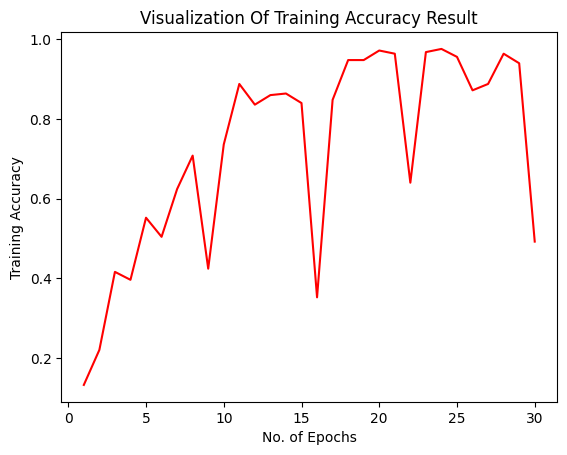

In [20]:
epochs = [i for i in range(1,31)]
plt.plot(epochs,training_history.history['accuracy'], color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Training Accuracy')
plt.title('Visualization Of Training Accuracy Result')
plt.show()

# Validation Accuracy

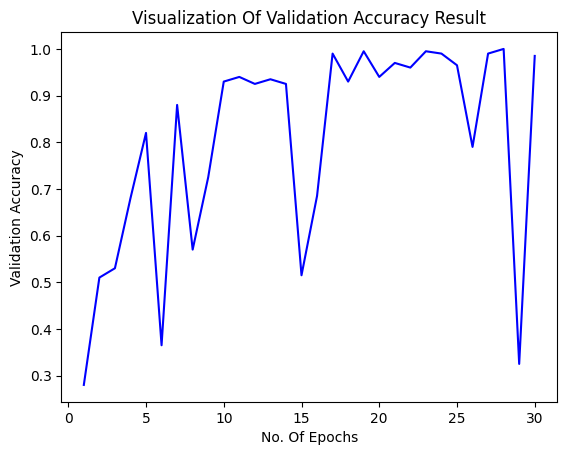

In [21]:
plt.plot(epochs,training_history.history['val_accuracy'], color='blue')
plt.xlabel('No. Of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization Of Validation Accuracy Result')
plt.show()